In [115]:
from sklearn import svm
import sklearn
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

### Task5: Consider the following training data

In [109]:
X = np.array([[1, 1], [2, 2],[2, 0], [0, 0], [1, 0], [0, 1]])
Y = np.array([1, 1, 1, 0, 0, 0])
clf = svm.SVC(kernel='linear', C=1.5)
clf.fit(X, Y)

SVC(C=1.5, kernel='linear')

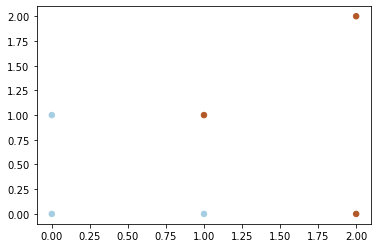

In [45]:
plt.scatter(X[:,0],X[:,1],c=Y,s=30,cmap=plt.cm.Paired)

In [96]:
clf.predict([[-1., 0.]])

array([0])

In [97]:
# get weight
clf.coef_

array([[1.4, 0.8]])

In [98]:
# get bias
clf.intercept_

array([-1.8])

In [99]:
# get support vectors
clf.support_vectors_

array([[1., 0.],
       [0., 1.],
       [1., 1.],
       [2., 0.]])

In [100]:
# get indices of support vectors
clf.support_

array([4, 5, 0, 2])

In [101]:
# get number of support vectors for each class
clf.n_support_

array([2, 2])

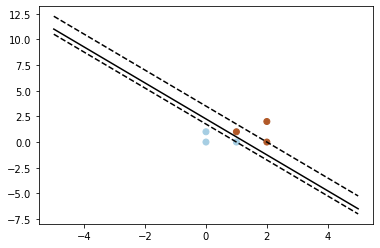

[ 0.4  2.6  1.  -1.8 -0.4 -1. ]


In [102]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

print(clf.decision_function(X))

### Task 6: Consider a dataset with 3 points in 1-D:

In [120]:
import math

X = np.array([[1, math.sqrt(2)*(-1), 1], [1, 0, 0],[1, math.sqrt(2), 1]])
y = np.array([0, 1, 0])
clf = svm.SVC(kernel='linear', C=1.5)
clf.fit(X, y)
# plt.scatter(X[:,0],X[:,1],X[:,2],c=y,s=10000,cmap=plt.cm.Paired)

SVC(C=1.5, kernel='linear')

In [125]:
# get weight
clf.coef_

array([[ 0. ,  0. , -1.5]])

In [126]:
# get bias
clf.intercept_

array([0.5])

In [122]:
# get support vectors
clf.support_vectors_

array([[ 1.        , -1.41421356,  1.        ],
       [ 1.        ,  1.41421356,  1.        ],
       [ 1.        ,  0.        ,  0.        ]])

In [123]:
# get indices of support vectors
clf.support_

array([0, 2, 1])

In [124]:
# get number of support vectors for each class
clf.n_support_

array([2, 1])

### Task 6:Learning SVMs on the Titanic dataset. Please report your five-fold cross validation classification accuracies on Titanic training set, with respect to the linear, quadratic, and RBF kernels. Which kernel is the best in your case?

In [110]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
# Fill NaN Mean for Age
train_df['Age'].fillna(value=train_df['Age'].mean(), inplace=True)
# Mode for Embarked
train_df['Embarked'].fillna(value=train_df['Embarked'].mode()[0], inplace=True)

# Rename Sex Value
train_df['Sex'] = train_df['Sex'].replace('female',1)
train_df['Sex'] = train_df['Sex'].replace('male',0)

# Rename Embarked Value
train_df['Embarked'] = train_df['Embarked'].replace('S',2)
train_df['Embarked'] = train_df['Embarked'].replace('C',1)
train_df['Embarked'] = train_df['Embarked'].replace('Q',0)

x_train = train_df[['Fare', 'Sex', 'Pclass', 'Age', 'Parch']]
y_train = train_df['Survived']
# x_test = test_df[['Fare', 'Sex', 'Pclass', 'Age', 'Parch']]
# y_test = test_df['Survived']

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)

clf = svm.SVC(probability=True)

# params = {'kernel': ['rbf', 'poly', 'linear'], 'C':[0.1,1,10,100,1000]}
params = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 100]},
    {'kernel': ['poly'], 'C': [1], 'degree': [2, 3]},
    {'kernel': ['rbf'], 'C': [1, 10, 100, 100], 'gamma':[1, 0.1, 0.01, 0.001]}
    ]

gc = GridSearchCV(clf, param_grid=params, cv=5, refit=True,return_train_score=True)
gc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid=[{'C': [0.1, 1, 10, 100, 100], 'kernel': ['linear']},
                         {'C': [1], 'degree': [2, 3], 'kernel': ['poly']},
                         {'C': [1, 10, 100, 100],
                          'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}],
             return_train_score=True)

In [119]:
y_pred = gc.predict(x_test)
print("Prediction test data set：", y_pred)
print("Accuracy", gc.score(x_test, y_test))
print("Best Estimator: ", gc.best_estimator_)

print("0 = Dead, 1 = Survived")
print(sklearn.metrics.classification_report(y_test, y_pred, target_names=None))

Prediction test data set： [1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0
 0 0 0 0 1 0 1 0 1]
Accuracy 0.7611940298507462
Best Estimator:  SVC(C=0.1, kernel='linear', probability=True)
0 = Dead, 1 = Survived
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       160
           1       0.72      0.66      0.69       108

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.76      0.76      0.76